In [ ]:
# EE590 Assignment #4: Final Project (Due Thursday, December 7th, 2023)

In [2]:
#1. Load Data into DataFrame:
# import necessary libraries
import pandas as pd

# Load the dataset from a CSV file into Pandas DataFrame
df = pd.read_csv('insurance.csv')
print(df.head()) # view first 5 rows of insurance data

    Age  Gender   BMI  Children Smoker     Region  Expenses
0  19.0  female  27.9         0    yes  southwest  16884.92
1  18.0    male  33.8         1     no  southeast   1725.55
2  28.0    male  33.0         3     no  southeast   4449.46
3  33.0    male  22.7         0     no  northwest  21984.47
4  32.0    male  28.9         0     no  northwest   3866.86


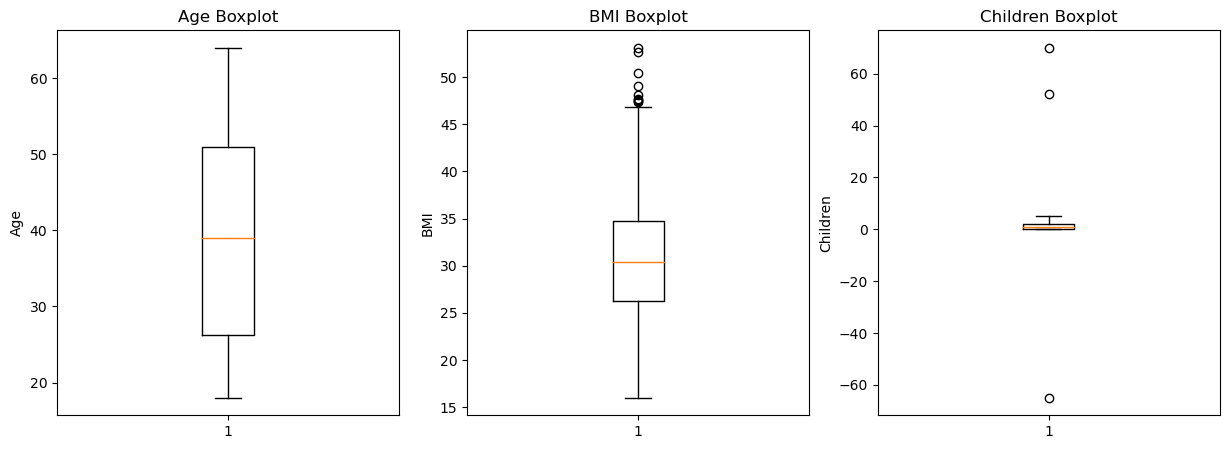

Age stats: {'Median': 39.0, 'Q1': 26.25, 'Q3': 51.0, 'Max': 64.0, 'Min': 18.0}
BMI stats: {'Median': 30.4, 'Q1': 26.3, 'Q3': 34.7, 'Max': 53.1, 'Min': 16.0}
Children stats: {'Median': 1.0, 'Q1': 0.0, 'Q3': 2.0, 'Max': 70, 'Min': -65}


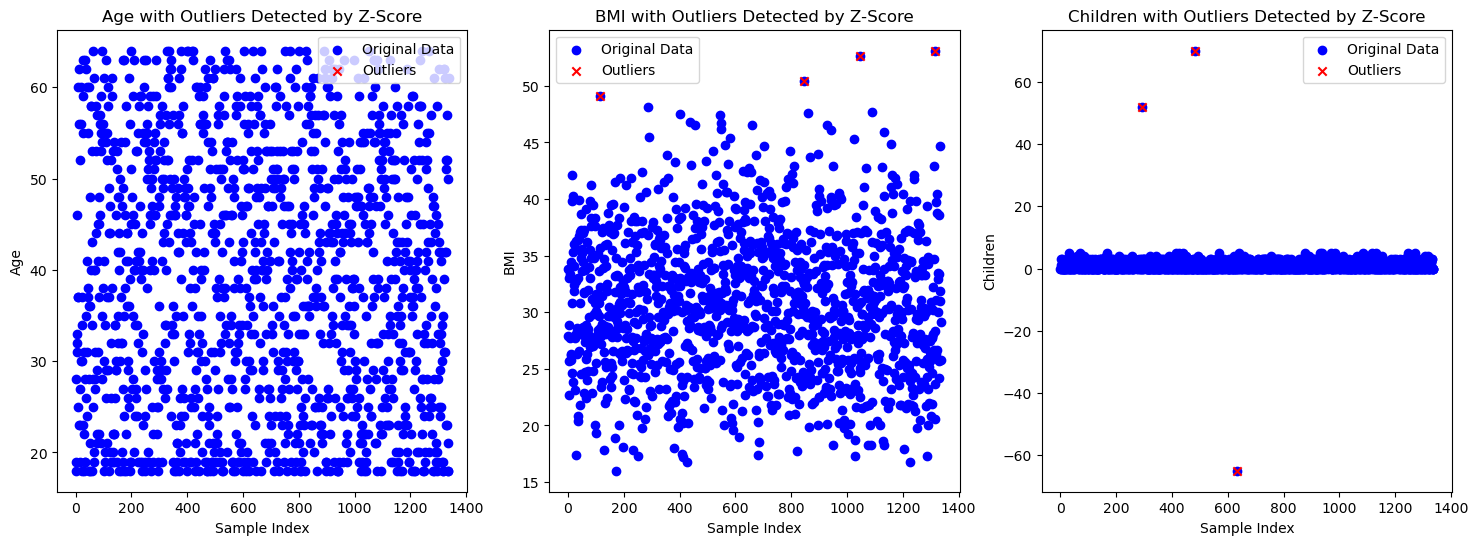

Filtered dataset (without outliers): 1319


In [10]:
#2. Outlier Detection and Removal:
# Use boxplots to identify outliers in continuous columns (Age, BMI, Children).
import numpy as np
import matplotlib.pyplot as plt

# Creating boxplots for Age, BMI, and Children
dfAge = df['Age'].dropna() # drop N/A values in 'Age'
dfBMI = df['BMI'].dropna() # drop N/A values in 'BMI'
dfChildren = df['Children'].dropna() # drop N/A values in 'Children'

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.boxplot(dfAge)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(132)
plt.boxplot(dfBMI)
plt.title('BMI Boxplot')
plt.ylabel('BMI')

plt.subplot(133)
plt.boxplot(dfChildren)
plt.title('Children Boxplot')
plt.ylabel('Children')

plt.show()

#--------------------------- 
# get exact values from boxplots (Median, Q1, Q2, Min, and Max)
def boxplot_stats(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    median = column.median()
    min_val = column.min()
    max_val = column.max()

    # Adjusted min/max for boxplot (excluding outliers)
    boxplot_min = Q1 - 1.5 * IQR
    boxplot_max = Q3 + 1.5 * IQR

    return {
        "Median": median,
        "Q1": Q1,
        "Q3": Q3,
        "Max": max_val,
        "Min": min_val
    }

# Applying the function to each column
age_stats = boxplot_stats(df['Age'])
bmi_stats = boxplot_stats(df['BMI'])
children_stats = boxplot_stats(df['Children'])

# Print the results
print("Age stats:", age_stats)
print("BMI stats:", bmi_stats)
print("Children stats:", children_stats)

#---------------------------
from scipy import stats
# Calculate Z-scores and remove data points where the absolute Z-score is greater than 3:
# # Calculate the Z-Score for each data point
df['Age_Z_Score'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['BMI_Z_Score'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()
df['Children_Z_Score'] = (df['Children'] - df['Children'].mean()) / df['Children'].std()

# Set a Z-Score threshold for outlier detection (z-score greater than 3.0)
z_score_threshold = 3.0

# Identify outliers
outliers_age = df[abs(df['Age_Z_Score']) > z_score_threshold]
outliers_bmi = df[abs(df['BMI_Z_Score']) > z_score_threshold]
outliers_children = df[abs(df['Children_Z_Score']) > z_score_threshold]

# Remove outliers from the dataset
df_filtered = df[(abs(df['Age_Z_Score']) <= z_score_threshold) &
                 (abs(df['BMI_Z_Score']) <= z_score_threshold) &
                 (abs(df['Children_Z_Score']) <= z_score_threshold)]

# Create a plot to visualize the original data and outliers
plt.figure(figsize=(18, 6))

# Age scatter plot
plt.subplot(131)
plt.scatter(range(len(df)), df['Age'], c='b', marker='o', label='Original Data')
plt.scatter(outliers_age.index, outliers_age['Age'], c='r', marker='x', label='Outliers')
plt.title('Age with Outliers Detected by Z-Score')
plt.xlabel('Sample Index')
plt.ylabel('Age')
plt.legend()

# BMI scatter plot 
plt.subplot(132)
plt.scatter(range(len(df)), df['BMI'], c='b', marker='o', label='Original Data')
plt.scatter(outliers_bmi.index, outliers_bmi['BMI'], c='r', marker='x', label='Outliers')
plt.title('BMI with Outliers Detected by Z-Score')
plt.xlabel('Sample Index')
plt.ylabel('BMI')
plt.legend()

# Scatter plot for Children
plt.subplot(133)
plt.scatter(range(len(df)), df['Children'], c='b', marker='o', label='Original Data')
plt.scatter(outliers_children.index, outliers_children['Children'], c='r', marker='x', label='Outliers')
plt.title('Children with Outliers Detected by Z-Score')
plt.xlabel('Sample Index')
plt.ylabel('Children')
plt.legend()

plt.show()

# Print the number of data points in the filtered dataset
print("Filtered dataset (without outliers):", df_filtered.shape[0])


In [11]:
#3. Handling Missing Values:

# Count missing values in each column.
missing_values = df.isnull().sum() # add up the count of missing values in each column
print("Missing values per column:")
print(missing_values)

# Fill missing values with mean value of the column (impute)
for column in df.columns: # address each column in the data
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].mean()) # fill N/A values with mean for numerical data
    else:
        df[column] = df[column].fillna(df[column].mode()[0]) # fill N/A values with mode for categorical data

missing_values = df.isnull().sum()
print("\nMissing values per column (After impute):")
print(missing_values)

# The decision was to impute instead of dropping missing data in order to retain the data. This 
# will lead to more accurate models because there is more data to work with. This is especially 
# when dealing with smaller datasets.

Missing values per column:
Age                 4
Gender              9
BMI                 8
Children            0
Smoker              0
Region              2
Expenses            1
Age_Z_Score         4
BMI_Z_Score         8
Children_Z_Score    0
dtype: int64

Missing values per column (After impute):
Age                 0
Gender              0
BMI                 0
Children            0
Smoker              0
Region              0
Expenses            0
Age_Z_Score         0
BMI_Z_Score         0
Children_Z_Score    0
dtype: int64


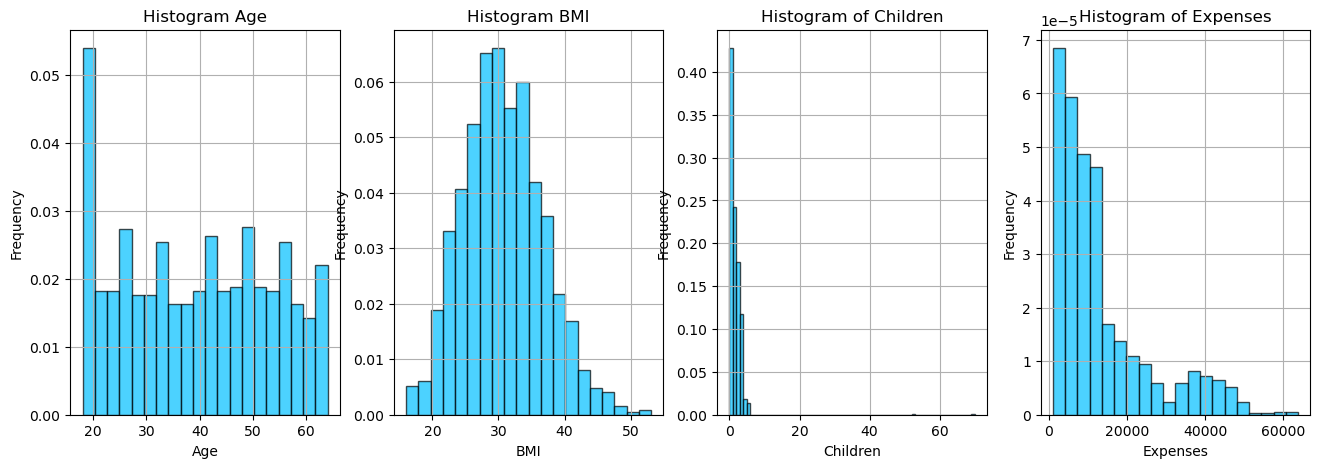

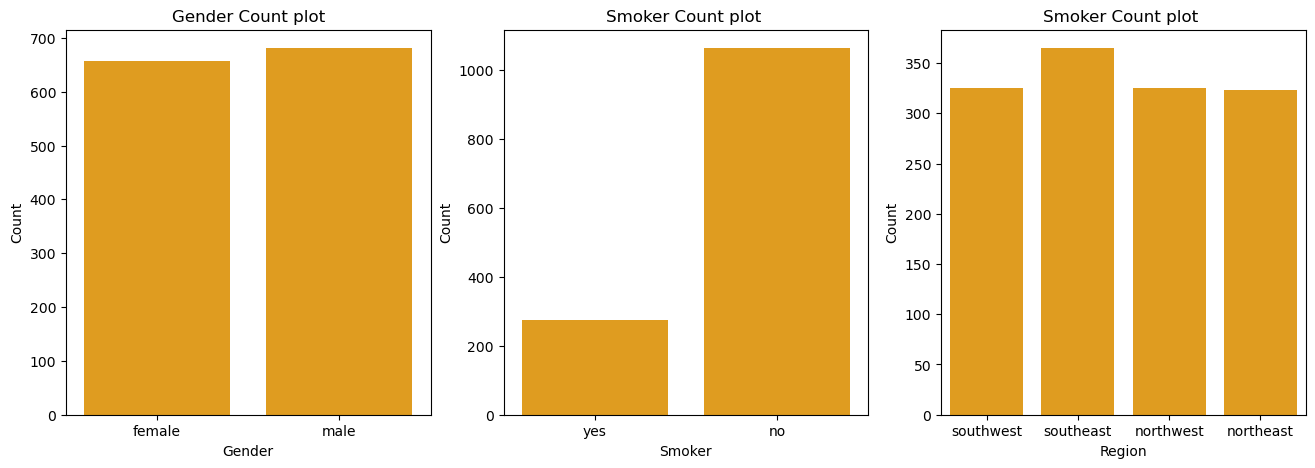

In [12]:
#4. Data Distribution Visualization:
# Plot histograms for each numerical column.

import seaborn as sns

dfAge = df['Age']
dfBMI = df['BMI']
dfChildren = df['Children']
dfExpenses = df['Expenses']

plt.figure(figsize=(16,5))

plt.subplot(141)
plt.hist(dfAge, bins=20, density=True, alpha=0.7, color='deepskyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Age')
plt.grid(True)

plt.subplot(142)
plt.hist(dfBMI, bins=20, density=True, alpha=0.7, color='deepskyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram BMI')
plt.grid(True)

plt.subplot(143)
plt.hist(dfChildren, bins=range(df['Children'].max() + 1) , density=True, alpha=0.7, color='deepskyblue', edgecolor='black')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Histogram of Children')
plt.grid(True)

plt.subplot(144)
plt.hist(dfExpenses, bins=20, density=True, alpha=0.7, color='deepskyblue', edgecolor='black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Histogram of Expenses')
plt.grid(True)


# Use bar charts or count plots for categorical columns.
# Creating count plots for categorical columns in the filtered dataset

plt.figure(figsize=(16, 5))

# Gender Count plot
plt.subplot(131)
sns.countplot(x='Gender', data=df, color='orange')
plt.title('Gender Count plot')
plt.xlabel('Gender')
plt.ylabel('Count')

# Smoker Count plot 
plt.subplot(132)
sns.countplot(x='Smoker', data=df, color='orange')
plt.title('Smoker Count plot ')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Smoker Count plot 
plt.subplot(133)
sns.countplot(x='Region', data=df, color='orange')
plt.title('Smoker Count plot ')
plt.xlabel('Region')
plt.ylabel('Count') 

plt.show()

In [13]:
#5. Descriptive Statistics and Variability Measures:
# Compute descriptive statistics (mean, median, mode, etc.) for numerical columns.
descriptive_statistics = df[['Age', 'BMI', 'Children', 'Expenses']].describe()
variability_measures = df[['Age', 'BMI', 'Children', 'Expenses']].agg(['std', 'var']) # aggregate across same axis using standard deviation and variance.

print(f'Descriptive Statistics:\n{descriptive_statistics}')
print('')
# Calculate variability measures (standard deviation, variance, etc.).
print(f'Variability Measures:\n{variability_measures}')
print('')

Descriptive Statistics:
               Age          BMI     Children      Expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.176912    30.676917     1.136024  13273.306111
std      14.020347     6.076607     3.194662  12109.551842
min      18.000000    16.000000   -65.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.450000     1.000000   9382.030000
75%      51.000000    34.600000     2.000000  16639.915000
max      64.000000    53.100000    70.000000  63770.430000

Variability Measures:
            Age        BMI   Children      Expenses
std   14.020347   6.076607   3.194662  1.210955e+04
var  196.570119  36.925147  10.205867  1.466412e+08



In [14]:
#6. Compute Quartiles:
# Determine quartiles for numerical columns (Age, BMI, Children, Expenses).

quartiles = df[['Age', 'BMI', 'Children', 'Expenses']].quantile([0.25, 0.50, 0.75]) # .quantile(Q1, Q2, Q3)
print(f'Quartiles:\n{quartiles}')

Quartiles:
       Age    BMI  Children    Expenses
0.25  27.0  26.30       0.0   4740.2875
0.50  39.0  30.45       1.0   9382.0300
0.75  51.0  34.60       2.0  16639.9150


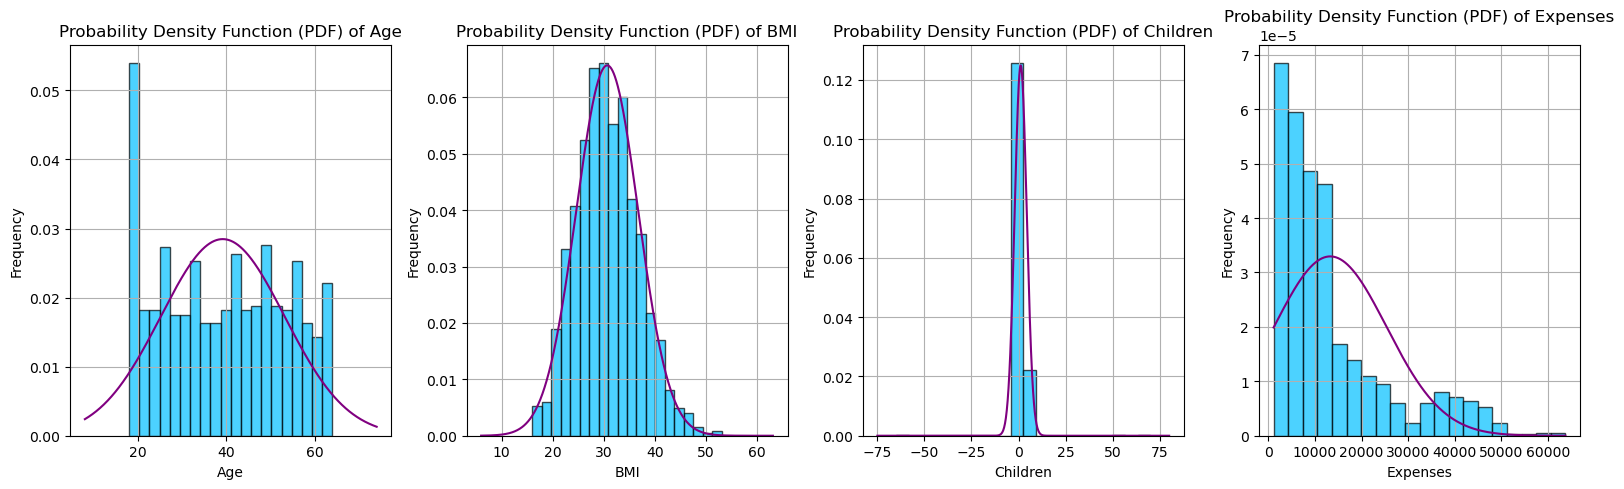

In [15]:
#7. Probability Distribution Modeling:
# Fit suitable probability distributions to selected columns and visualize the fits.
from scipy.stats import norm

numerical_data = {'Age': dfAge,'BMI': dfBMI,'Children': dfChildren, 'Expenses': dfExpenses}

plt.figure(figsize=(16,5))

for i, (name, data) in enumerate(numerical_data.items(), 1): # iterate over each item in 'numerical_data' dictionary, enumerating i (start from 1) and name-data pair (dictionary)
    # Mean and standard deviation
    mu = np.mean(data) # Mean
    sigma = np.std(data) # Standard deviation
    
    # Generate values for the x-axis
    x = np.linspace(min(data) - 10, max(data) + 10, 1000)
    
    # Calculate the PDF using the scipy.stats.norm module
    pdf_values = norm.pdf(x, loc=mu, scale=sigma)
    
    # Create a histogram to visualize the data
    plt.subplot(1, 4, i)
    plt.hist(data, bins=20, density=True, alpha=0.7, color='deepskyblue', edgecolor='black')
    plt.xlabel(f'{name}')
    plt.ylabel('Frequency')
    plt.title(f'Probability Density Function (PDF) of {name}')
    plt.grid(True)
    
    # Plot the theoretical PDF of the normal distribution
    plt.plot(x, pdf_values, color='purple')
    
plt.tight_layout()    
plt.show()


In [16]:
#8. Feature Scaling:
# Apply standardization or normalization to the numerical features.
# import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical data
num_cols = ['Age', 'BMI', 'Children']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
#9. Linear Regression Modeling:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode categorical variables
encoded_df = pd.get_dummies(df, drop_first=True) # convert categorical variables into dummy/indicator variables (0 or 1 for columns within each category)
# 'drop_first=True': 

# Select 'Expenses' as the target variable
# Create and train a linear regression model using the remaining columns.
X = encoded_df.drop('Expenses', axis=1) # features (everything but expenses)
y = encoded_df['Expenses'] # target label (isolating expenses)

# Separate into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regission_model = LinearRegression() # Create a linear regression model
regission_model.fit(X_train, y_train) # Train the model on the data

LinearRegression()

In [20]:
#10. Prediction and Model Evaluation:
# Make predictions using the model.
y_pred = regission_model.predict(X_test) # Predict the test set results

# Evaluate model performance using R-squared, MSE, or other relevant metrics.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred) # Calculate R-squared
print(f'r2:       {r2}')

mse = mean_squared_error(y_test, y_pred) # Calculate MSE (Mean squared Error)
print(f'mse:      {mse}')

print(f"Root mse: {np.sqrt(mse)}") # Calculate root MSE

mae = mean_absolute_error(y_test, y_pred) # Calculate MAE ((Mean Absolute Error)
print(f'mae:      {mae}')

r2:       0.7805184692957049
mse:      34074229.7183082
Root mse: 5837.3135703256685
mae:      4215.489765033138
